In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

Vietcombank

In [2]:
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb= vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

vcb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


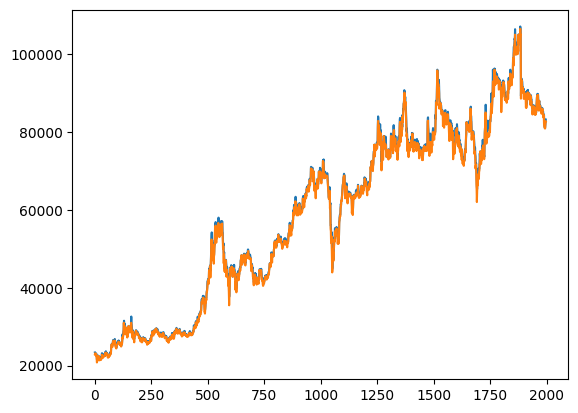

In [3]:
# gán biến
y = vcb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = vcb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [4]:
# chia train, test
train_size = int(0.8 * len(vcb))
test_size = len(vcb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)


SVR(kernel='sigmoid')

In [6]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [7]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))


In [8]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 5.006119685242942
RBF MSLE:  0.009309191026886328
RBF RMSE: Price    8521.327838
dtype: float64
Poly MAPE: 7.850192857897653
Poly MSLE: 0.007769423674039574
Poly RMSE: Price    8830.639353
dtype: float64
Sigmoid MAPE: 38.94493234883538
Sigmoid MSLE: 0.2596093409878044
Sigmoid RMSE: Price    34850.169597
dtype: float64


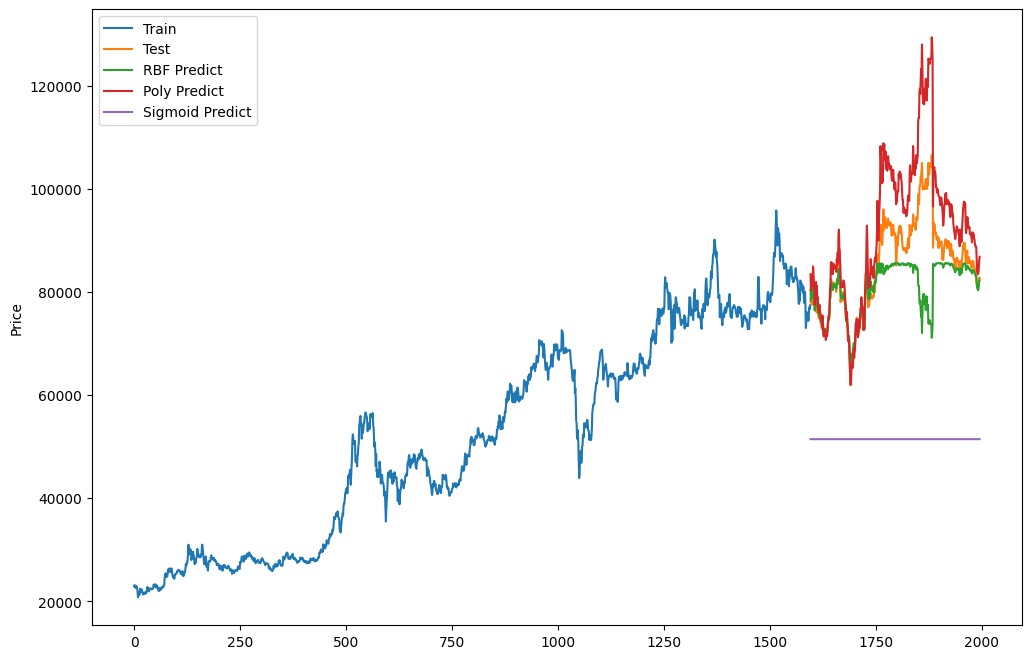

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
#lấy giá trị Price của ngày cuối cùng trong dataset
last_index = vcb.index[-1]
last_row = vcb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[82700]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([81836.33993805]), array([81094.05122784]), array([80424.7173007]), array([79800.36566283]), array([79203.16526725]), array([78620.93269617]), array([78044.94167331]), array([77468.78178921]), array([76887.7469112]), array([76298.5111435]), array([75698.96560488]), array([75088.14017956]), array([74466.15787681]), array([73834.1818684]), array([73194.32500518]), array([72549.50302215]), array([71903.22708979]), array([71259.3473924]), array([70621.77338115]), array([69994.2041217]), array([69379.90121586]), array([68781.5276863]), array([68201.06242881]), array([67639.78601863]), array([67098.3235784]), array([66576.7257155]), array([66074.56873775]), array([65591.05875927]), array([65125.12900985]), array([64675.52421939])]
Kết quả dự đoán sử dụng Poly: [array([64240.86958452]), array([63819.72431187]), array([63410.62118443]), array([63012.09426684]), array([62622.6970198]), array([62241.01295204]), array([61865.66065802]), array([61495.29476846]),

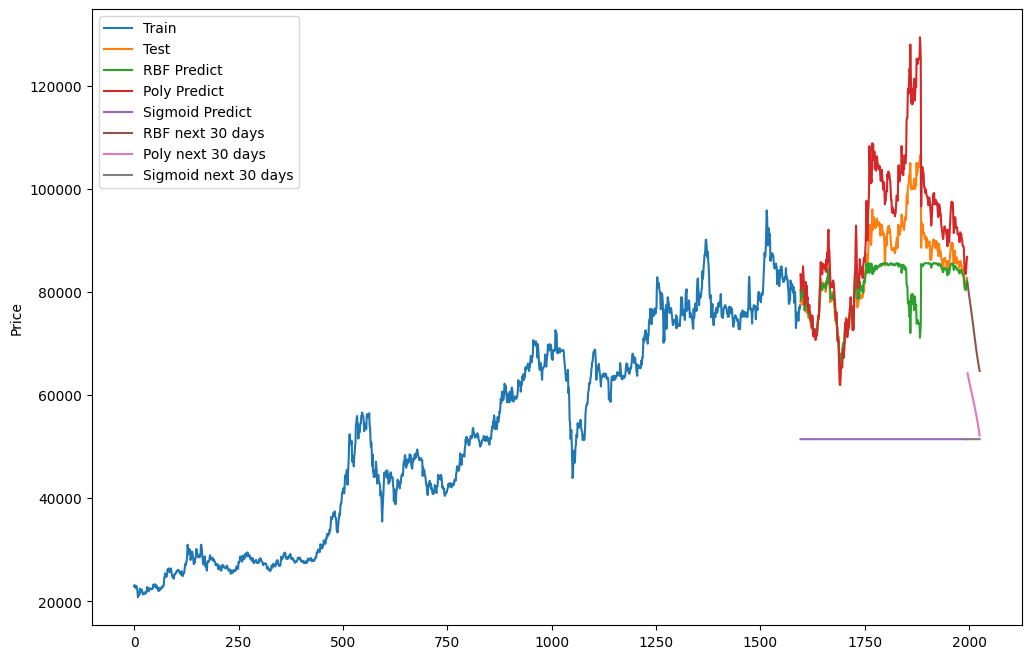

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

MB bank

In [13]:
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

mbb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


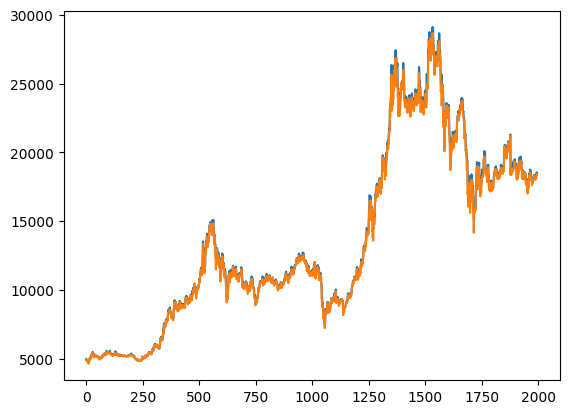

In [14]:
# gán biến
y = mbb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = mbb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [15]:
# chia train, test
train_size = int(0.8 * len(mbb))
test_size = len(mbb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [16]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)


SVR(kernel='sigmoid')

In [17]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [18]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [19]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 0.8910909728204861
RBF MSLE:  0.00017841639834379044
RBF RMSE: Price    242.746973
dtype: float64
Poly MAPE: 6.210349626609457
Poly MSLE: 0.0047871143649742594
Poly RMSE: Price    1220.343036
dtype: float64
Sigmoid MAPE: 44.1013646856873
Sigmoid MSLE: 0.3514752797491623
Sigmoid RMSE: Price    8666.765749
dtype: float64


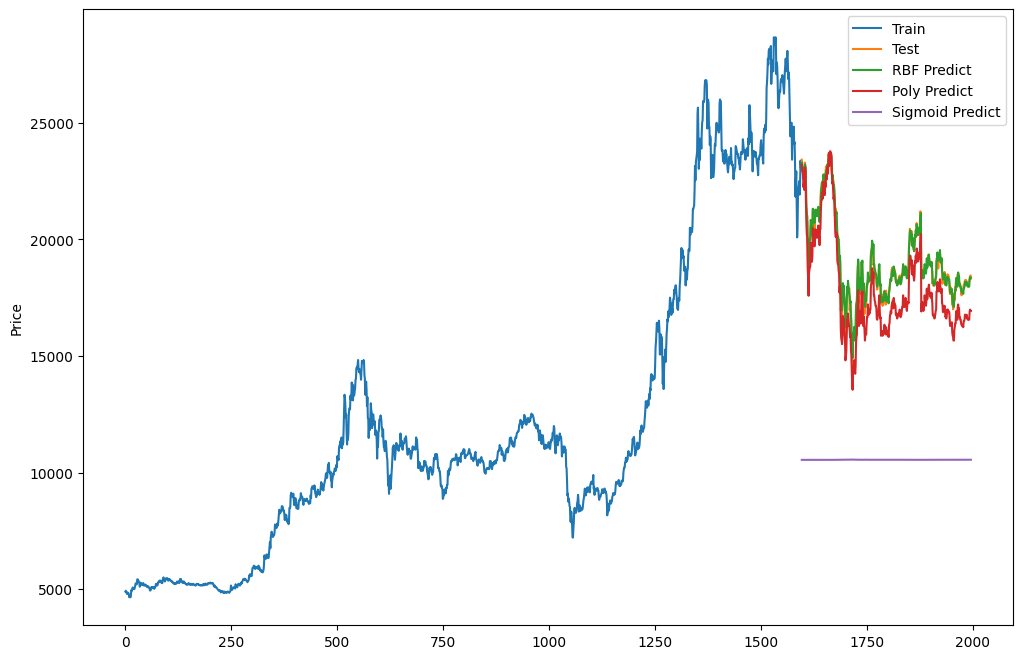

In [20]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = mbb.index[-1]
last_row = mbb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[18400]])

In [22]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18223.05256489]), array([18042.80441934]), array([17859.27239172]), array([17672.56010459]), array([17482.8594405]), array([17290.44849714]), array([17095.68548875]), array([16898.9984231]), array([16700.8708542]), array([16501.82451005]), array([16302.40002964]), array([16103.13732215]), array([15904.5571221]), array([15707.14514139]), array([15511.33985241]), array([15317.52445593]), array([15126.02308906]), array([14937.10089909]), array([14750.96730319]), array([14567.78159253]), array([14387.66000906]), array([14210.68349311]), array([14036.90543169]), array([13866.35889525]), array([13699.06300894]), array([13535.02824607]), array([13374.26054945]), array([13216.7642786]), array([13062.54404958]), array([12911.60558346])]
Kết quả dự đoán sử dụng Poly: [array([12763.95571196]), array([12619.60170805]), array([12478.55011774]), array([12340.80526763]), array([12206.36761329]), array([12075.2320765]), array([11947.38649674]), array([11822.8102959

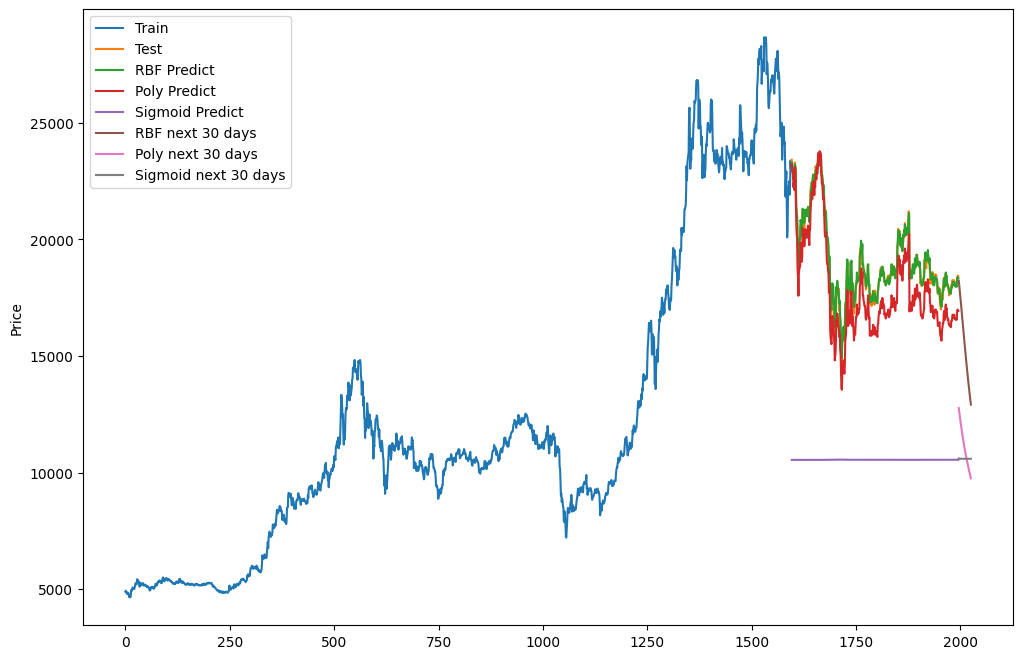

In [23]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

BIDV

In [24]:
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

bidv

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


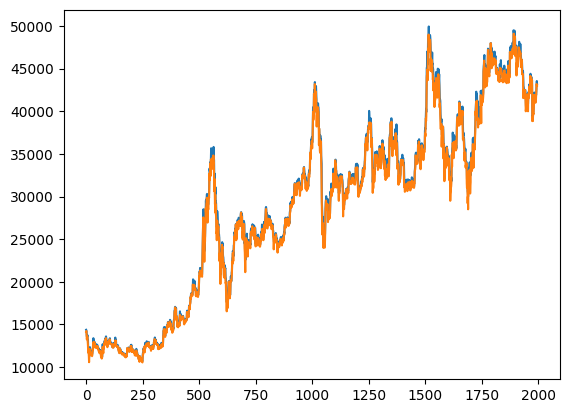

In [25]:
# gán biến
y = bidv[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = bidv[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [26]:
# chia train, test
train_size = int(0.8 * len(bidv))
test_size = len(bidv) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [27]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [28]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [29]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [30]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 1.6184330228751271
RBF MSLE:  0.0005426893805856605
RBF RMSE: Price    1014.970083
dtype: float64
Poly MAPE: 10.981344957926686
Poly MSLE: 0.013560379992163717
Poly RMSE: Price    5586.86036
dtype: float64
Sigmoid MAPE: 34.20878459968281
Sigmoid MSLE: 0.1968258268699197
Sigmoid RMSE: Price    15226.498214
dtype: float64


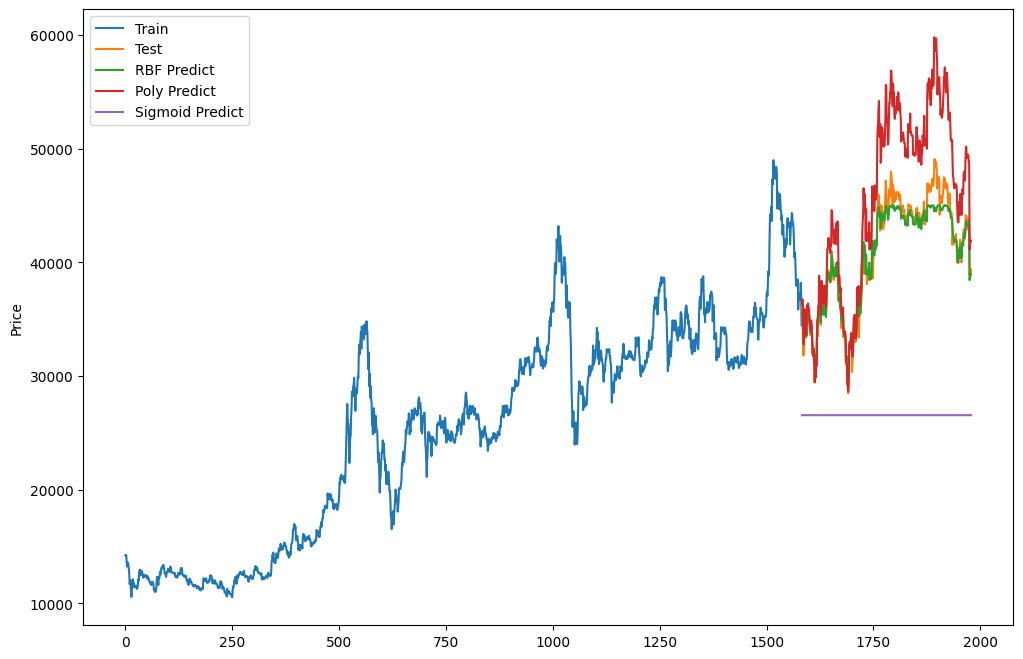

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = bidv.index[-1]
last_row = bidv.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[39400.]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([38848.24370646]), array([38293.12011752]), array([37741.39154198]), array([37199.79742636]), array([36674.07799642]), array([36168.36896971]), array([35685.03165977]), array([35224.82677134]), array([34787.27075257]), array([34371.03047894]), array([33974.26848277]), array([33594.90489677]), array([33230.79641871]), array([32879.84773568]), array([32540.0740319]), array([32209.63086603]), array([31886.82375111]), array([31570.10602565]), array([31258.07066779]), array([30949.43961808]), array([30643.05278208]), array([30337.85799349]), array([30032.90267222]), array([29727.32759033]), array([29420.36297876]), array([29111.32711294]), array([28799.6274661]), array([28484.7644868]), array([28166.33801834]), array([27844.05631063])]
Kết quả dự đoán sử dụng Poly: [array([27517.74745735]), array([27187.37290301]), array([26853.04238564]), array([26515.02930503]), array([26173.78504328]), array([25829.9502587]), array([25484.36071324]), array([25138.04491

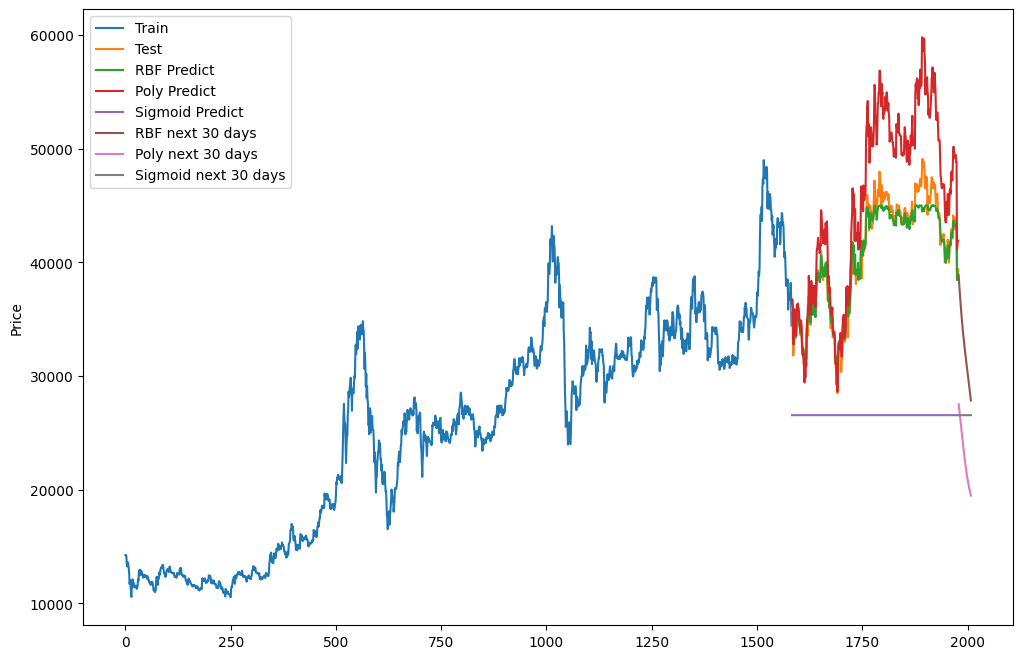

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()